# Import

## packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config IPCompleter.use_jedi = False

import pandas as pd
import numpy as np
import pickle
import os
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from bioreactor.plotting import *
from bioreactor.utils import *
from bioreactor.ssgsea import *
from bioreactor.gsea import *
from bioreactor.annotation import *
from bioreactor.survival import *

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'png'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 120
sns.set_style('ticks')

## functions

In [ ]:
import re


def detect_fges_source(fges):
    sc_source = [
        "HE_LIM_SUN_FETAL_LUNG_",
        "DESCARTES_",
        "TRAVAGLINI_LUNG_",
        "FAN_EMBRYONIC_",
        "FAN_OVARY_",
        "GAUTAM_EYE_",
        "HAY_BONE_MARROW_",
        "DURANTE_ADULT_OLFACTORY_NEUROEPITHELIUM_",
        "CUI_DEVELOPING_HEART_",
        "LAKE_ADULT_KIDNEY_",
        "RUBENSTEIN_SKELETAL_MUSCLE_",
    ]
    if re.search("^Main4", fges):
        return "Internal"
    elif re.search("^RANDOM", fges):
        return "Random_FGES"
    elif [None] * len(sc_source) != [
        re.search(f"^{prefix}", fges) for prefix in sc_source
    ]:
        return "MSigDb_Single_Cell"
    elif "XCELL" in fges:
        return "xCell"
    elif "BINDEA" in fges:
        return "Bindea"
    elif "NIRMAL" in fges:
        return "Nirmal"
    elif (
        re.search("^GOBP_", fges)
        or re.search("^GOCC_", fges)
        or re.search("^GOMF_", fges)
    ):
        return "Gene_Ontology"
    elif re.search("^KEGG_", fges):
        return "KEGG"
    elif re.search("^BIOCARTA_", fges):
        return "BioCarta"
    elif re.search("^WP_", fges):
        return "WikiPathways"
    elif re.search("^REACTOME_", fges):
        return "Reactome"
    elif re.search("^PID_", fges):
        return "Pathway_Interaction_Database"
    elif re.search("^HP_", fges):
        return "Human_Phenotype_Ontology"
    elif (
        re.search(".*_VS_.*UP$", fges)
        or re.search(".*_VS_.*DN$", fges)
        or re.search("^(?!.*VS).*UP$", fges)
    ):
        return "MSigDb_Dif_Expression"
    elif fges in all_msigdb_gmt.keys():
        return "MSigDb_Other"
    else:
        return "Other"

<Axes: >

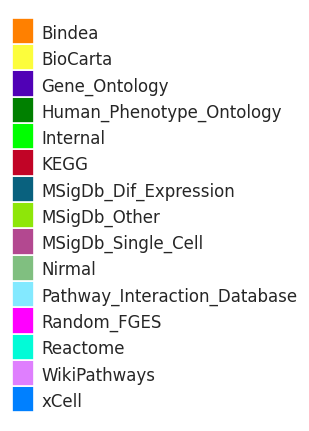

In [ ]:
import distinctipy

signature_palette = [
    "Internal",
    "Random_FGES",
    "xCell",
    "Bindea",
    "Nirmal",
    "Gene_Ontology",
    "KEGG",
    "BioCarta",
    "WikiPathways",
    "Reactome",
    "Human_Phenotype_Ontology",
    "MSigDb_Dif_Expression",
    "MSigDb_Single_Cell",
    "MSigDb_Other",
    "Pathway_Interaction_Database",
]
colors = distinctipy.get_colors(len(signature_palette), n_attempts=1000)


def rgb_to_hex(rgb_tuple):
    r, g, b = [round(x * 255) for x in rgb_tuple]
    return "#{:02x}{:02x}{:02x}".format(r, g, b)


signature_palette = {
    signature_palette[i]: rgb_to_hex(colors[i]) for i in range(len(signature_palette))
}
patch_plot(signature_palette)

In [9]:
signature_palette

{'Internal': '#00ff00',
 'Random_FGES': '#ff00ff',
 'xCell': '#0080ff',
 'Bindea': '#ff8000',
 'Nirmal': '#80bf80',
 'Gene_Ontology': '#5001b6',
 'KEGG': '#c10426',
 'BioCarta': '#fcfd3c',
 'WikiPathways': '#df7ffe',
 'Reactome': '#02fbd7',
 'Human_Phenotype_Ontology': '#008000',
 'MSigDb_Dif_Expression': '#09617e',
 'MSigDb_Single_Cell': '#b34890',
 'MSigDb_Other': '#8ee609',
 'Pathway_Interaction_Database': '#83e9ff'}

<Axes: >

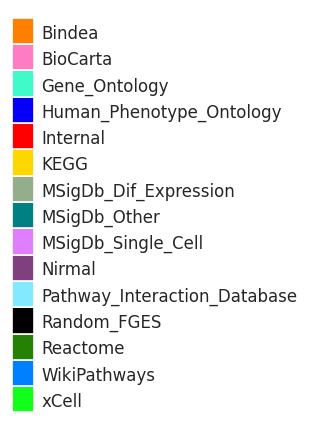

In [ ]:
signature_palette = {
    "Internal": "#ff0000",
    "Random_FGES": "black",
    "xCell": "#12ff1b",
    "Bindea": "#ff8000",
    "Nirmal": "#804080",
    "Gene_Ontology": "#40fbc9",
    "KEGG": "gold",
    "BioCarta": "#fe7cc3",
    "WikiPathways": "#0080ff",
    "Reactome": "#258103",
    "Pathway_Interaction_Database": "#83e9ff",
    "Human_Phenotype_Ontology": "#0500f5",
    "MSigDb_Dif_Expression": "#93ae8b",
    "MSigDb_Single_Cell": "#df7ffe",
    "MSigDb_Other": "#008080",
}
patch_plot(signature_palette)

## data

In [ ]:
all_msigdb_gmt = read_gene_sets("./data/msigdb.v2023.1.Hs.symbols.gmt")

In [ ]:
import pickle

p = Path("./data/")
with open(p / "mapping_ssgseas.pkl", "rb") as handle:
    mapping_ssgseas = pickle.load(handle)
for key in mapping_ssgseas.keys():
    for i in mapping_ssgseas[key]["Goi"].keys():
        print(key, "\t", i, "\t", mapping_ssgseas[key]["Goi"][i].shape)

Main4_Th1_signature 	 Th1_cells 	 (20, 65)
Main4_CD8_T_cells 	 CD8_T_cells 	 (453, 269)
Main4_Treg 	 Tregs 	 (73, 168)
Main4_Neutrophil_signature 	 Neutrophils 	 (199, 107)
Main4_Mast_cell_signature 	 Mast_cells 	 (51, 53)
Main4_Effector_cells 	 CD8_T_cells 	 (453, 386)
Main4_Effector_cells 	 NK_cells 	 (202, 386)
Main4_Eosinophil_signature 	 Eosinophils 	 (12, 39)
Main4_Follicular_helper_T_cells 	 Follicular_T_helper_tonsil 	 (24, 50)
Main4_B_cells 	 B_cells 	 (504, 378)
Main4_Endothelium 	 Endothelium 	 (322, 98)
Main4_Pan_macrophage_signature 	 Macrophages 	 (527, 261)
Main4_NK_cells 	 NK_cells 	 (202, 108)
Main4_M2_signature 	 Macrophages_M2 	 (23, 20)
Main4_T_cells 	 T_cells 	 (164, 155)
Main4_CD4_T_cells 	 CD4_T_cells 	 (1699, 423)
Main4_CD4_T_cells 	 CD4_T_helpers 	 (73, 423)
Main4_Lymphatic_endothelium 	 Endothelium_lymph 	 (89, 26)
Main4_Th17_signature 	 Th17_cells 	 (19, 54)
Main4_Plasma_cells 	 Plasma_B_cells 	 (11, 45)
Main4_Plasma_cells 	 Plasmablasts 	 (14, 45)
Main4_Mono

In [ ]:
with open(p / "msigdb_gmt.pkl", "rb") as handle:
    msigdb_gmt = pickle.load(handle)

In [ ]:
# public_cells_annot = read_dataset('/internal_data/public_cells_annot.tsv.gz') #Sharing by request

In [15]:
public_cells_annot = public_cells_annot[~public_cells_annot.index.duplicated()]

In [ ]:
from mldeconv.data_loading import read_expressions

public_cells_expr = read_expressions(public_cells_annot)
public_cells_expr = np.log2(public_cells_expr + 1)

In [17]:
ranked_expr = public_cells_expr.rank(pct=True)
pipeline_genes = public_cells_expr.index.to_list()

In [ ]:
parent_to_daughter = {
    "Main4_T_cells": [
        "Main4_Th17_signature",
        "Main4_Th1_signature",
        "Main4_CD8_T_cells",
        "Main4_Treg",
        "Main4_Effector_cells",
        "Main4_CD4_T_cells",
        "Main4_Follicular_helper_T_cells",
    ],
    "Main4_CD4_T_cells": [
        "Main4_Th17_signature",
        "Main4_Th1_signature",
        "Main4_Follicular_helper_T_cells",
        "Main4_Treg",
    ],
    "Main4_B_cells": ["Main4_Plasma_cells"],
    "Main4_Pan_macrophage_signature": ["Main4_M2_signature"],
    "Main4_Monocyte": ["Main4_Pan_macrophage_signature", "Main4_M2_signature"],
    "Main4_Endothelium": ["Main4_Lymphatic_endothelium"],
}
for parent in parent_to_daughter.keys():
    print(parent)
    parent_dict = mapping_ssgseas[parent]["Goi"]
    daughter_columns = set()
    for daughter in parent_to_daughter[parent]:
        daughter_dict = mapping_ssgseas[daughter]["Goi"]
        for cell_type in daughter_dict.keys():
            for s in set(daughter_dict[cell_type].columns):
                daughter_columns.add(s)
    for cell_type in parent_dict.keys():
        df = parent_dict[cell_type]
        print(len(df.columns))
        clean_cols = [i for i in df.columns if i not in daughter_columns]
        print(len(clean_cols))
        mapping_ssgseas[parent]["Goi"][cell_type] = df[clean_cols]

Main4_T_cells
155
148
Main4_CD4_T_cells
423
421
423
421
Main4_B_cells
378
378
Main4_Pan_macrophage_signature
261
261
Main4_Monocyte
162
160
Main4_Endothelium
98
87


# Scatter plots

## FGES classification metrics

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


def scale_series(series, feature_range=(0, 1)):
    name = series.name
    scaler = MinMaxScaler(feature_range=feature_range)
    series_2d = series.values.reshape(-1, 1)
    scaled_series_2d = scaler.fit_transform(series_2d)
    scaled_series = pd.Series(scaled_series_2d.flatten(), index=series.index)
    scaled_series.name = name
    return scaled_series


def get_metric_for_signature(series, labels, verbose=False, youden_thr=False):
    y_test_bin = labels
    y_pred = scale_series(series)
    fpr, tpr, thresholds = metrics.roc_curve(y_test_bin, y_pred)
    if youden_thr:
        thr = thresholds[np.argmax(tpr - fpr)]
    else:
        thr = thresholds[np.argmin(np.sqrt((0 - fpr) ** 2 + (1 - tpr) ** 2))]
    roc_auc = metrics.auc(fpr, tpr)
    y_pred_bin = pd.cut(y_pred, bins=[-1, thr, 777], labels=[0, 1])
    f1 = metrics.f1_score(y_test_bin, y_pred_bin, average="weighted")
    accuracy = metrics.accuracy_score(y_test_bin, y_pred_bin)
    recall_score = metrics.recall_score(y_test_bin, y_pred_bin)
    precision_score = metrics.precision_score(y_test_bin, y_pred_bin)
    av_precision = metrics.average_precision_score(y_test_bin, y_pred_bin)
    precision, recall, _ = metrics.precision_recall_curve(y_test_bin, y_pred)
    pr_auc = metrics.auc(recall, precision)
    if verbose:
        print(sign, "\t", "recall_score", "\t", f"{recall_score:.4f}")
        print(sign, "\t", "precision_score", "\t", f"{precision_score:.4f}")
        print(sign, "\t", "accuracy", "\t", f"{accuracy:.4f}")
        print(sign, "\t", "f1", "\t", f"{f1:.4f}")
        print(sign, "\t", "roc auc", "\t", f"{roc_auc:.4f}")
        print(sign, "\t", "average precision", "\t", f"{av_precision:.4f}")
        print(sign, "\t", "pr auc", "\t", f"{pr_auc:.4f}")
    m_dict = {
        "F1": f1,
        "Accuracy": accuracy,
        "Precision_score": precision_score,
        "Average_precision": av_precision,
        "ROC_AUC": roc_auc,
        "PR_AUC": pr_auc,
        "Recall_score": recall_score,
    }
    return m_dict


def derive_rank_deviation(control, goi, sign, fges):
    gs = [i for i in msigdb_gmt[sign][fges].genes if i in pipeline_genes]
    goi_ranked_df = ranked_expr[goi.index].loc[gs].T
    control_ranked_df = ranked_expr[control.index].loc[gs].T
    goi_cv = (goi_ranked_df.std() / goi_ranked_df.mean()).mean()
    control_cv = (control_ranked_df.std() / control_ranked_df.mean()).mean()
    goi_std = (goi_ranked_df.std()).mean()
    control_std = (control_ranked_df.std()).mean()
    dev_dict = {
        "goi_cv": goi_cv,
        "control_cv": control_cv,
        "goi_std": goi_std,
        "control_std": control_std,
    }
    return dev_dict

In [ ]:
public_cells_annot = public_cells_annot[public_cells_annot.Cell_type != "Th2_cells"]

In [ ]:
def get_strat_cell_type(control, seed):
    cell_types = public_cells_annot.Cell_type.reindex(control.index).dropna()
    min_samples = cell_types.value_counts().min()
    sampled_indices = []
    for cell_type in cell_types.unique():
        cell_type_indices = cell_types[cell_types == cell_type].index
        np.random.seed(seed)
        sampled_indices.extend(
            np.random.choice(cell_type_indices, min_samples, replace=False)
        )
    cell_types = cell_types.loc[sampled_indices]
    new_control = control.reindex(cell_types.index).dropna()
    return new_control, cell_types

In [ ]:
from sklearn.model_selection import train_test_split

fges_metrics = {}
total = sum([len(msigdb_gmt[i].keys()) for i in msigdb_gmt.keys()])
iter = 10
pbar = tqdm(total=total * iter, desc="Processing", position=0, leave=True)
for sign in list(mapping_ssgseas.keys())[::-1]:
    control = pd.concat(
        [
            mapping_ssgseas[sign]["Control"][i]
            for i in mapping_ssgseas[sign]["Control"].keys()
        ]
    )
    control = control[~control.index.duplicated()]
    goi = pd.concat(
        [mapping_ssgseas[sign]["Goi"][i] for i in mapping_ssgseas[sign]["Goi"].keys()]
    )
    goi = goi[~goi.index.duplicated()]
    for fges in goi.columns:
        fges_metrics[fges] = {}
        for seed in range(0, iter):
            new_control, cell_types = get_strat_cell_type(control, seed)
            if len(goi) > len(new_control) and len(goi) > 50:
                goi_size = len(new_control)
            elif len(goi) < 50:
                goi_size = 50
            else:
                goi_size = len(goi)
            if len(goi) <= 100 or len(new_control) <= 100:
                control_size = 100
            elif len(goi) > len(new_control) and len(new_control) > 100:
                control_size = len(new_control)
            else:
                control_size = len(goi)
            # print(fges, goi_size, control_size)
            sample_perc = control_size / (len(new_control) + len(goi))
            _, control_subsample = train_test_split(
                new_control,
                test_size=sample_perc,
                stratify=cell_types,
                random_state=seed,
            )
            goi_subsample = goi.sample(n=goi_size, replace=True, random_state=seed)
            labels = pd.concat(
                [
                    pd.Series(
                        index=control_subsample.index,
                        data=[0 for i in control_subsample.index],
                    ),
                    pd.Series(
                        index=goi_subsample.index, data=[1 for i in goi_subsample.index]
                    ),
                ]
            )
            df = pd.concat([control_subsample, goi_subsample])
            m_dict = get_metric_for_signature(
                df[fges], labels, verbose=False, youden_thr=False
            )
            dev_dict = derive_rank_deviation(control_subsample, goi, sign, fges)
            for key in dev_dict.keys():
                m_dict[key] = dev_dict[key]
            fges_metrics[fges][seed] = m_dict
            pbar.update(1)
pbar.close()

Processing:  99%|█████████▉| 28450/28670 [43:14<00:20, 10.96it/s] 


In [ ]:
import pickle

p = Path("./data/")
with open(p / "fges_metrics_controls_goi_wo_bootstrap.pkl", "wb") as handle:
    pickle.dump(fges_metrics, handle, pickle.HIGHEST_PROTOCOL)

In [83]:
signature_palette.keys()

dict_keys(['Internal', 'Random_FGES', 'xCell', 'Bindea', 'Nirmal', 'Gene_Ontology', 'KEGG', 'BioCarta', 'WikiPathways', 'Reactome', 'Pathway_Interaction_Database', 'Human_Phenotype_Ontology', 'MSigDb_Dif_Expression', 'MSigDb_Single_Cell', 'MSigDb_Other'])

In [ ]:
def plot_scatter_with_ci(
    data,
    metric_x="goi_cv",
    metric_y="F1",
    title=None,
    random_score=0.5,
    path=None,
    xlabel=None,
    ylabel=None,
):
    means_x = []
    means_y = []
    stds_x = []
    stds_y = []
    labels = []

    label_counts = {}
    for key in data.keys():
        fges_type = detect_fges_source(key)
        label_counts[fges_type] = label_counts.get(fges_type, 0) + 1

    for key, values in data.items():
        x_values = [v[metric_x] for v in values.values()]
        y_values = [v[metric_y] for v in values.values()]

        mean_x = np.mean(x_values)
        mean_y = np.mean(y_values)
        std_x = np.std(x_values)
        std_y = np.std(y_values)

        means_x.append(mean_x)
        means_y.append(mean_y)
        stds_x.append(std_x)
        stds_y.append(std_y)
        labels.append(key)

    zipped = zip(means_x, means_y, stds_x, stds_y, labels)
    sort_order = [
        "Internal",
        "Nirmal",
        "Bindea",
        "xCell",
        "KEGG",
        "Gene_Ontology",
        "Human_Phenotype_Ontology",
        "BioCarta",
        "Reactome",
        "WikiPathways",
        "Pathway_Interaction_Database",
        "MSigDb_Single_Cell",
        "MSigDb_Other",
        "MSigDb_Dif_Expression",
        "Random_FGES",
    ]
    order_dict = {key: index for index, key in enumerate(sort_order)}
    zipped_sorted = sorted(
        zipped, key=lambda x: label_counts[detect_fges_source(x[4])], reverse=True
    )

    fig, ax = plt.subplots(figsize=(6, 3.5))
    label_to_handle = {}
    seen_labels = set()

    for mean_x, mean_y, std_x, std_y, label in zipped_sorted:
        fges_type = detect_fges_source(label)
        color = signature_palette[fges_type]
        if fges_type not in seen_labels:
            handle = ax.errorbar(
                mean_x,
                mean_y,
                yerr=std_y,
                fmt="o",
                label=fges_type,
                c=color,
                ecolor="#B6B6B4",
                capsize=2,
                markersize=4,
                elinewidth=1,
            )
            label_to_handle[fges_type] = handle
            seen_labels.add(fges_type)
        else:
            ax.errorbar(
                mean_x,
                mean_y,
                yerr=std_y,
                fmt="o",
                label="_nolegend_",
                c=color,
                ecolor="#B6B6B4",
                capsize=2,
                markersize=4,
                elinewidth=1,
            )
    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(metric_x)
    if ylabel:
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel(metric_y)

    y_coord = random_score
    x_coord = min(means_x) + 0.001
    plt.axhline(y=y_coord, color="crimson", linestyle="--", alpha=0.5, linewidth=1)
    plt.text(
        x_coord,
        y_coord + 0.003,
        "Random\nPrediction",
        color="crimson",
        fontsize=6.5,
        ha="left",
    )

    random_means_y = [
        mean_y
        for _, mean_y, _, _, label in zipped_sorted
        if detect_fges_source(label) == "Random_FGES"
    ]
    y_coord = max(random_means_y)
    x_coord = min(means_x) + 0.001
    plt.axhline(y=y_coord, color="crimson", linestyle="--", alpha=0.5, linewidth=1)
    plt.text(
        x_coord,
        y_coord + 0.003,
        "Random\nFGES",
        color="crimson",
        fontsize=6.5,
        ha="left",
    )
    handles, labels = [], []
    for label in sort_order:
        if label in label_to_handle:
            handles.append(label_to_handle[label])
            labels.append(label)
    ax.legend(
        handles,
        labels,
        bbox_to_anchor=(1.05, 1.0),
        loc="upper left",
        bbox_transform=ax.transAxes,
    )

    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', bbox_transform=ax.transAxes)
    plt.tight_layout(pad=0.5)
    if title:
        plt.title(title)
    name = title + ".svg"
    plt.savefig(path / name, format="svg")
    plt.show()
    plt.close()

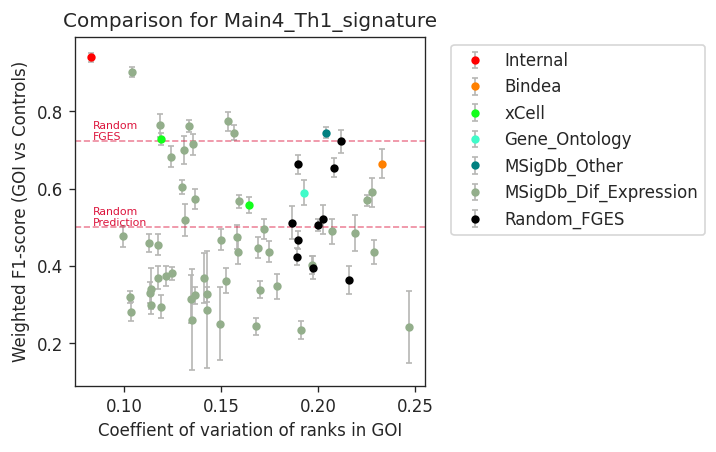

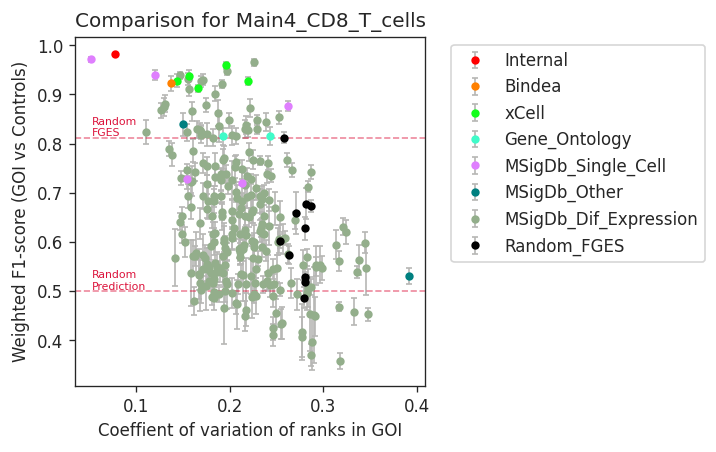

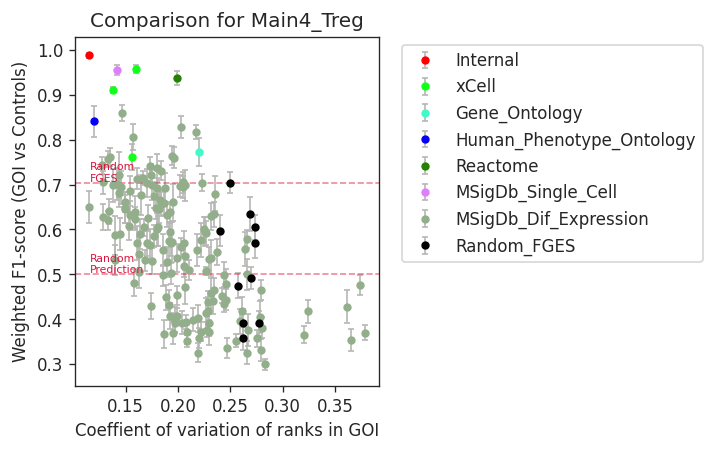

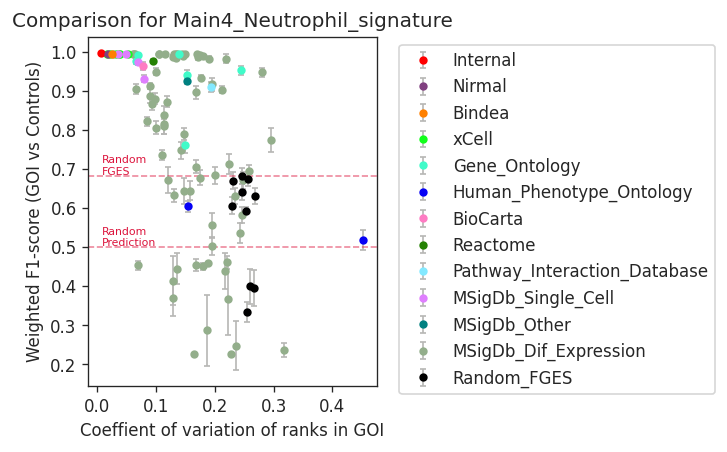

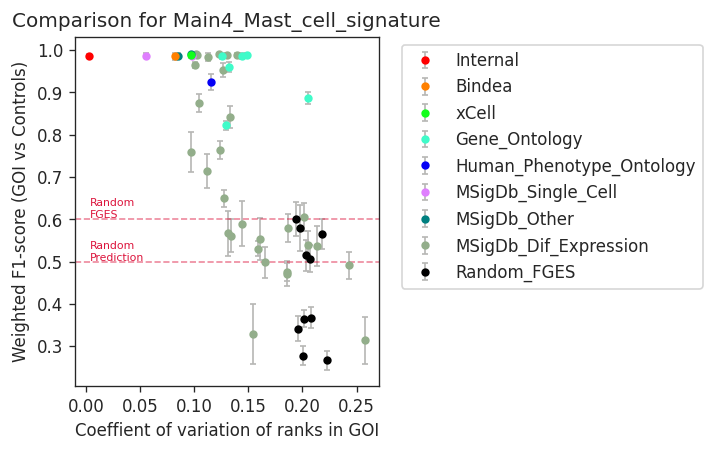

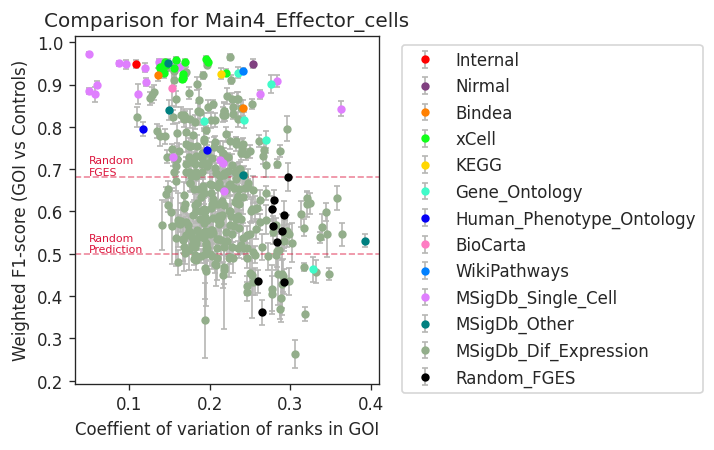

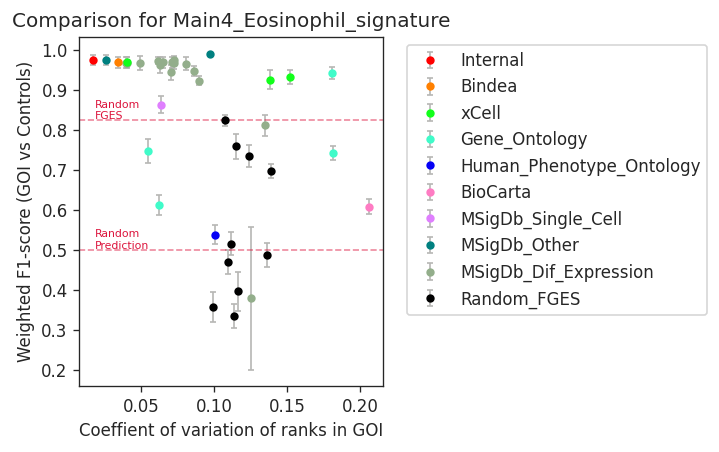

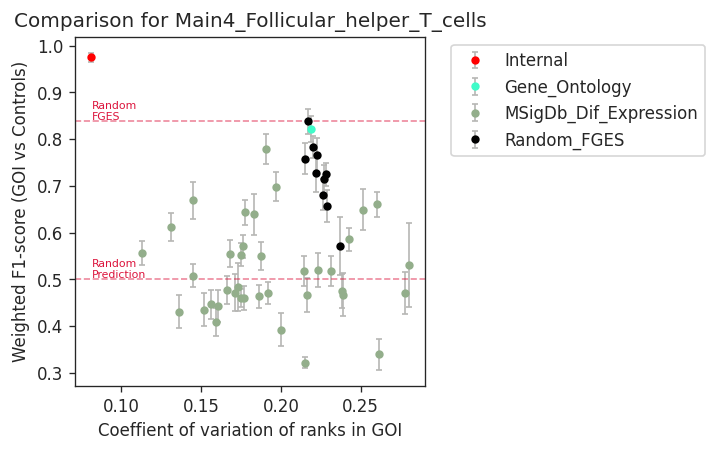

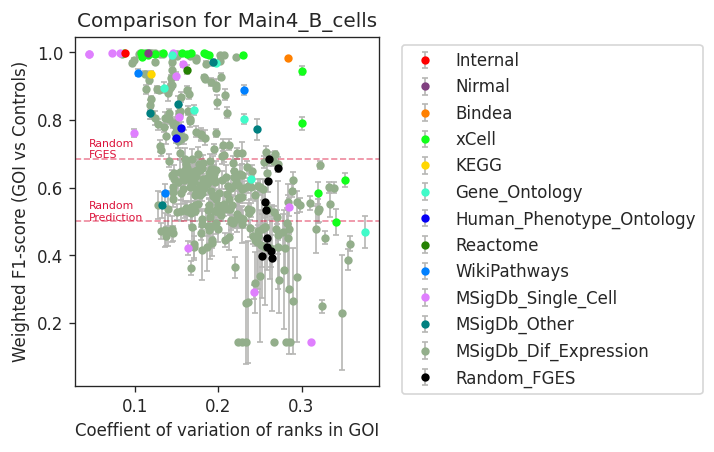

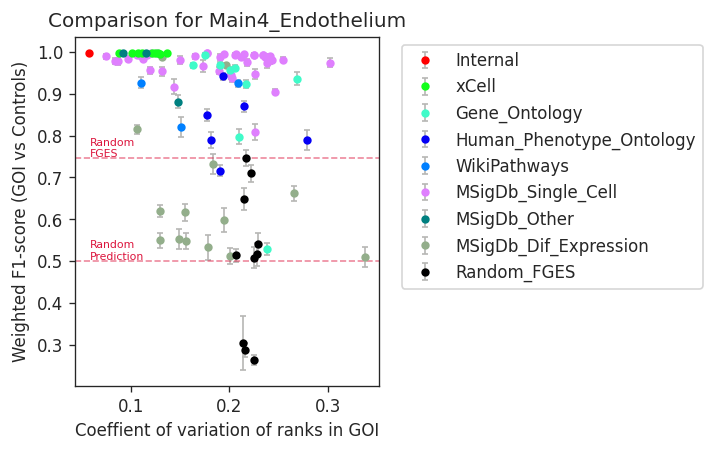

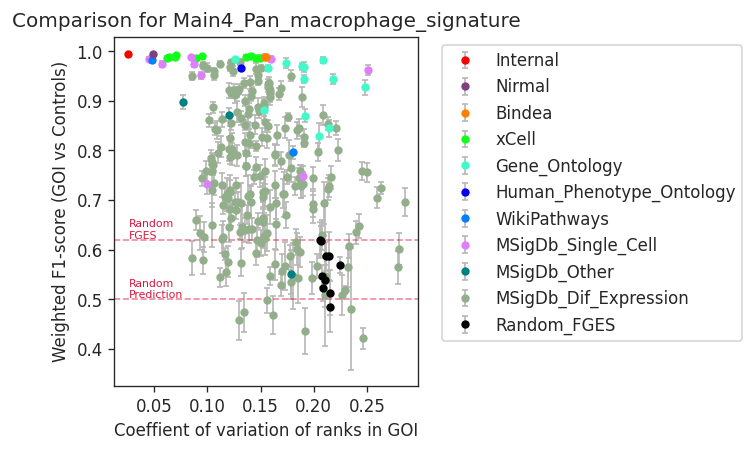

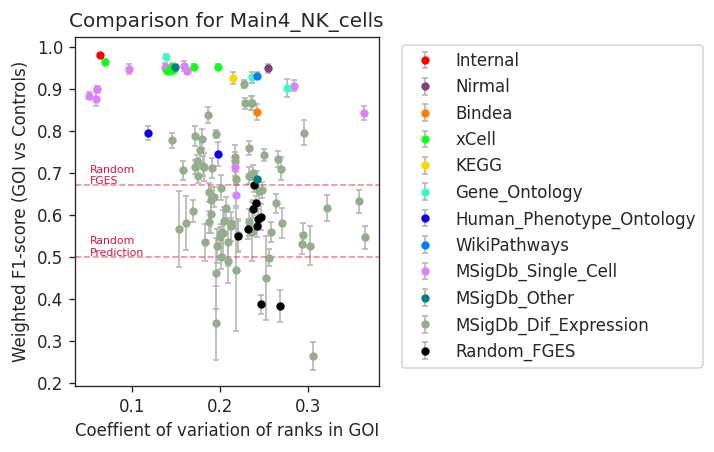

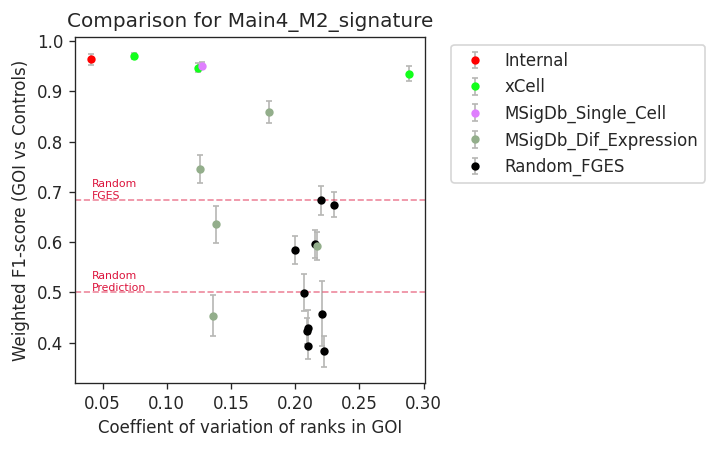

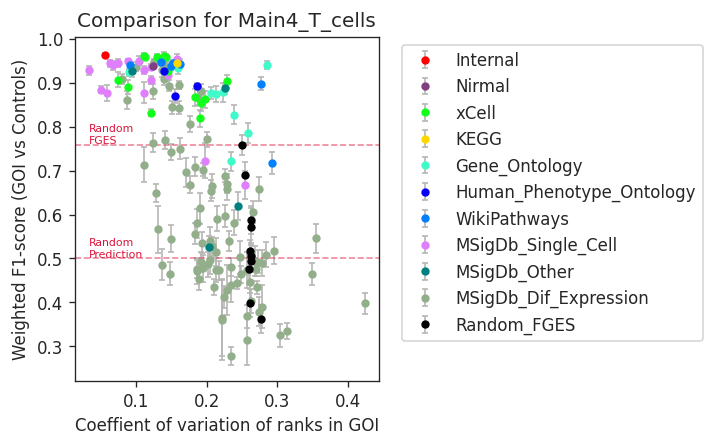

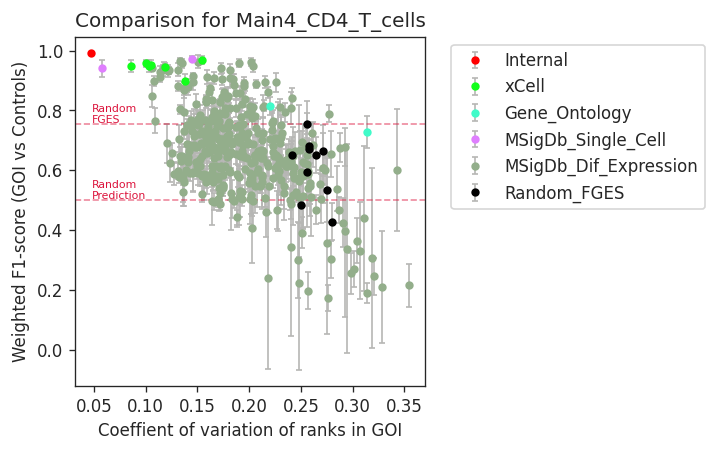

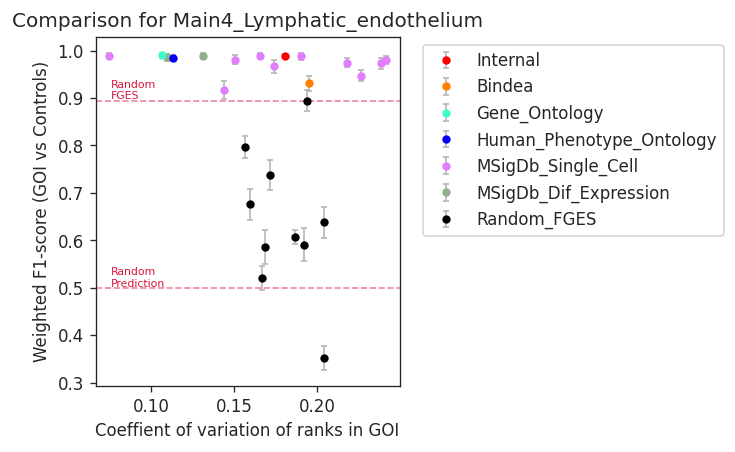

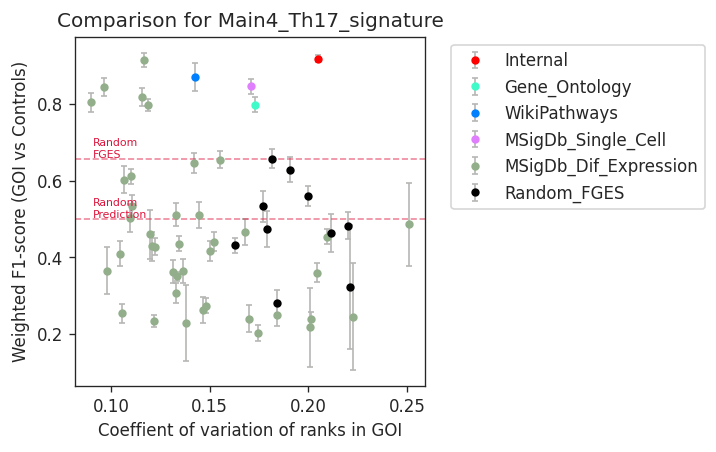

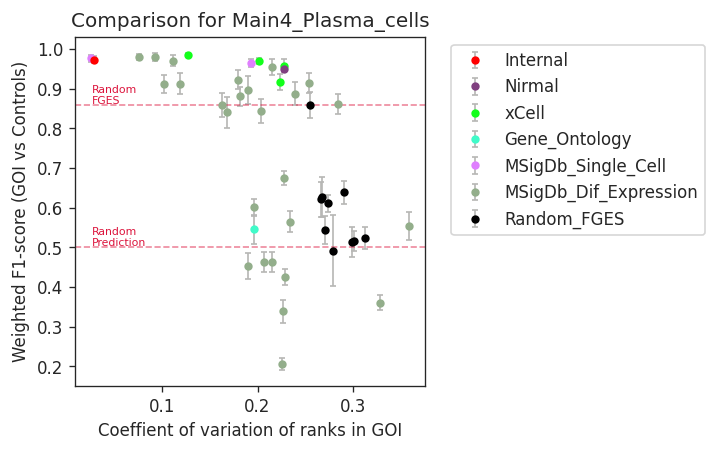

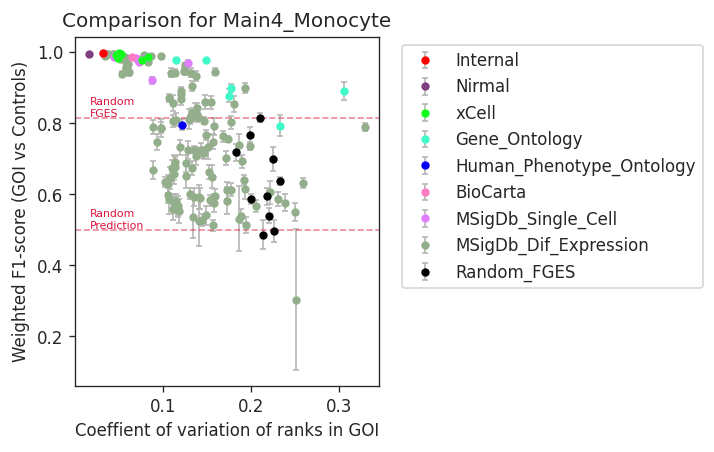

In [ ]:
path = Path("./plots/svg_pictures_F1_cv/")
for bg_sign in msigdb_gmt.keys():
    alt_signs = msigdb_gmt[bg_sign].keys()
    plot_dict = {i: fges_metrics[i] for i in alt_signs if i in fges_metrics.keys()}
    plot_scatter_with_ci(
        plot_dict,
        title=f"Comparison for {bg_sign}",
        path=path,
        xlabel="Coeffient of variation of ranks in GOI",
        ylabel="Weighted F1-score (GOI vs Controls)",
    )

In [ ]:
def plot_scatter_with_ci_agg(
    data,
    metric_x="goi_cv",
    metric_y="F1",
    title=None,
    random_score=0.5,
    path=None,
    xlabel=None,
    ylabel=None,
):
    sort_order = [
        "Internal",
        "Nirmal",
        "Bindea",
        "xCell",
        "Gene_Ontology",
        "Human_Phenotype_Ontology",
        "WikiPathways",
        "MSigDb_Single_Cell",
        "MSigDb_Other",
        "MSigDb_Dif_Expression",
        "Random_FGES",
    ]
    aggregated_data = {key: [] for key in sort_order}

    for key, values in data.items():
        fges_type = detect_fges_source(key)

        x_values = [v[metric_x] for v in values.values()]
        y_values = [v[metric_y] for v in values.values()]
        if fges_type in sort_order:
            aggregated_data[fges_type].extend(list(zip(x_values, y_values)))

    means_x = []
    means_y = []
    stds_x = []
    stds_y = []
    labels = []

    for key, values in aggregated_data.items():
        x_values, y_values = zip(*values)

        mean_x = np.mean(x_values)
        mean_y = np.mean(y_values)
        std_x = np.std(x_values)
        std_y = np.std(y_values)

        means_x.append(mean_x)
        means_y.append(mean_y)
        stds_x.append(std_x)
        stds_y.append(std_y)
        labels.append(key)

    zipped_sorted = sorted(
        zip(means_x, means_y, stds_x, stds_y, labels),
        key=lambda x: len(aggregated_data[x[4]]),
        reverse=True,
    )

    fig, ax = plt.subplots(figsize=(6, 3.5))
    label_to_handle = {}
    for mean_x, mean_y, std_x, std_y, label in zipped_sorted:
        color = signature_palette[label]
        handle = ax.errorbar(
            mean_x,
            mean_y,
            xerr=std_x,
            yerr=std_y,
            fmt="o",
            label=label,
            c=color,
            ecolor="#B6B6B4",
            capsize=3,
            markersize=6,
            elinewidth=1,
            capthick=1,
        )
        label_to_handle[label] = handle

    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(metric_x)
    if ylabel:
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel(metric_y)

    y_coord = 0.5
    x_coord = min(means_x) - 0.05
    plt.axhline(y=y_coord, color="crimson", linestyle="--", alpha=0.5)
    plt.text(
        x_coord,
        y_coord + 0.005,
        "Random Prediction",
        color="crimson",
        fontsize=6.5,
        ha="left",
    )
    handles, labels = [], []
    for label in sort_order:
        if label in label_to_handle:
            handles.append(label_to_handle[label])
            labels.append(label)
    ax.legend(
        handles,
        labels,
        bbox_to_anchor=(1.05, 1.0),
        loc="upper left",
        bbox_transform=ax.transAxes,
    )
    plt.tight_layout(pad=0.5)
    if title:
        plt.title(title)
    name = title + ".svg"
    plt.savefig(path / name, format="svg")
    plt.show()
    plt.close()

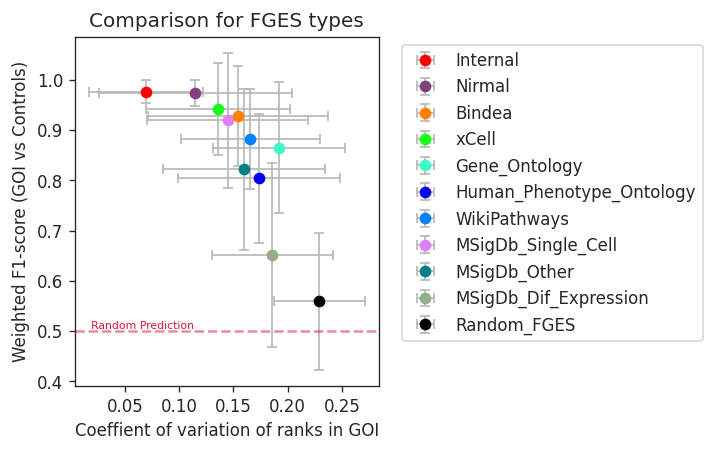

In [ ]:
path = Path("./plots/")
plot_scatter_with_ci_agg(
    fges_metrics,
    title=f"Comparison for FGES types",
    path=path,
    xlabel="Coeffient of variation of ranks in GOI",
    ylabel="Weighted F1-score (GOI vs Controls)",
)